Plot number of blog posts per day, by parsing Typepad [plaintext blog export](https://help.typepad.com/back_up.html).

Richard Akerman
April 4, 2021

Code developed in [Google Colaboratory](https://colab.research.google.com/) will be posted to GitHub (scilib) with MIT License.

Had to download and re-upload to Colaboratory because it wouldn't save the original for some unknown reason.

Always remember you have to re-run this code block by code block from the top, when starting a new session.

# Visual inspection of the plaintext download

Text viewed in Mac BBEdit.

Header block for each blog post is:
<pre>
AUTHOR: firstname lastname
AUTHOR EMAIL: author_email_address
TITLE: title
STATUS: for published blog posts the status is "Publish"
ALLOW COMMENTS: allow_comments looks like it is 0 or 1.  Seems likely that 1 is true and 0 is false.
CONVERT BREAKS: convert_breaks - one valid value is "wysiwyg"
ALLOW PINGS: allow_pings also 0 or 1, again presumably 1 is true, 0 is false.
BASENAME: basename is the post-unique part of the URL e.g."jupyter-notebooks-in-google-colaboratory"
CATEGORY: a separate entry on a separate line for each category ( each one headed with CATEGORY: ),
 the content is the name of a single category e.g. "Software Development"
UNIQUE URL: unique_url is the full URL to the post e.g.
 https://scilib.typepad.com/science_library_pad/2021/03/jupyter-notebooks-in-google-colaboratory.html 
DATE: date time, in MM/DD/YYYY and HH:MM:SS AM/PM e.g. 03/30/2021 08:37:26 PM
</pre>

So basically just want to pull out all the dates for blog posts with status = "Publish", and then count per date.

# Start of pseudocode and coding information


# Open and read the file

Note this of course is using a particular static filename in a variable.

To do this on Colaboratory, need to decide whether to do it locally from drive, or to open it from computer's file system each time.

Google Colab Support Notebook - External data: Local Files, Drive, Sheets, and Cloud Storage https://colab.research.google.com/notebooks/io.ipynb

Due to third-party cookie issues with uploads, it turns out to be way easier to just access the file from Google Drive.

So bring over the Google Drive code from my StatsCan Chart.ipynb notebook.

Note that for cleanup [Google recommends](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveA) unmounting when done:

<code>drive.flush_and_unmount()</code>

# Parse the file: How does Python parse plaintext?

Computer Hope - [How to extract specific portions of a text file using Python](https://www.computerhope.com/issues/ch001721.htm)

Although not efficient, it seems like it would make sense to parse line by line, and set a flag if status is "Publish", in order to add that post to the running counts.


# Parse the file: How to check strings, parse out date

Need to do some string checking.  Not sure if this is the most efficient way, but anyway.

Stack Overflow - [Does Python have a string 'contains' substring method?](https://stackoverflow.com/questions/3437059/does-python-have-a-string-contains-substring-method)

Parsing out date

Stack Abuse - [Converting Strings to datetime in Python](https://stackabuse.com/converting-strings-to-datetime-in-python/)

Don't forget to import datetime.

Question: Does Python prefer all imports at the beginning, or closer to use?

Parsing considerations:

*   will break if your blog posts use "DATE:" or "AUTHOR:" in the body of the blog post
*   hardcoded filename
*   will break if file format changes
*   some potential file size risk if the file is gigantic
*   should be checking for returned error codes



# do dataframe things

w3schools - [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)

Stack Overflow - [append dictionary to data frame](https://stackoverflow.com/questions/51774826/append-dictionary-to-data-frame)

You're supposed to make a list of lists or a list of dictionaries, and then make the dataframe out of the final list.

Stack Overflow - [Creating an empty Pandas DataFrame, then filling it?](https://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-then-filling-it)

Stack Overflow - [How can I create an array/list of dictionaries in python?](https://stackoverflow.com/questions/2397754/how-can-i-create-an-array-list-of-dictionaries-in-python)

Stack Overflow - [Convert list of dictionaries to a pandas DataFrame](https://stackoverflow.com/questions/20638006/convert-list-of-dictionaries-to-a-pandas-dataframe)

thispointer - [Pandas: Create Dataframe from list of dictionaries](https://thispointer.com/pandas-create-dataframe-from-list-of-dictionaries/)



# dataframe counting magic

Python doesn't like iteration, apparently.  Just use built-in methods.

kanoki - [How to use Pandas Count and Value_Counts](https://kanoki.org/2020/03/09/how-to-use-pandas-count-and-value_counts/)

Stack Overflow - [changing sort in value_counts](https://stackoverflow.com/questions/43855474/changing-sort-in-value-counts)



# Extract the date from the MultiIndex

[pandas.MultiIndex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.html)



# Plot

Data to Fish - [How to Plot a DataFrame using Pandas](https://datatofish.com/plot-dataframe-pandas/)


# End of pseudocode and coding information

# Results of testing

Using print() statements etc.

Did various tests against the file, including first printing out the entire file
(which made for a pretty long screen printout), and then counting the number of
posts that say "STATUS: Publish" (published posts).

Code fragments.  (In markdown comments.)
<!---
#       print(myline)                  # and print the string.

# File read successful.  print shows each line, although presumably due to line termination character issues, 
#  it's showing an extra line break for each one.
-->

<!---
        publish_count += 1

print(publish_count)

# 2404 published posts 
# check against Typepad...
# Typepad doesn't seem to report published posts and draft posts separately,
#  only the total number of posts
# 2420 total posts
# but you can also list just draft posts and manually count them
# indeed I have 16 draft blog posts, which is a lot more than I thought
# so 2420 - 16 = 2404 published posts as expected
-->

<!---
import pandas as pd

# make a dictionary entry
# dataframe_columns = {'Date' : [], 'Post_Count' : 0}
myline_dictionary = {'Date' : "2007-04-04", "Post_Count": 1}
df_posts_per_date = pd.DataFrame()
df_posts_per_date = df_posts_per_date.append(myline_dictionary, ignore_index=True)

# well, this doesn't work
# df_posts_per_date.append({'Date': ['1999'], 'Post_Count' : 1}, ignore_index=True)

print(df_posts_per_date)
-->
<!---
# sample and compare against actual published blog posts to verify the counts
# sample_plot = pd.DataFrame(df_posts_plot.sample(5))
# print(sample_plot)
# sample_plot.plot.bar(figsize=(30,10),legend=False)
# verified - counts are correct

# look at just the first five rows to see what the sorting looks like
# if you set use_index=False it just puts 0,1,2 as x axis labels instead of the dates
# sample_plot = pd.DataFrame(df_posts_plot.head(5))
# print(sample_plot)
# ax = sample_plot.plot(kind='bar',figsize=(30,10),legend=False) # how do you suppress the plot from displaying?
# ax.xaxis.set_visible(False)
# verified - it is sequential by date
-->

Summary: It is able to correctly identify the 2404 published posts.


# Start of code

# Mount the Google Drive

(This only needs to be done once per active session.
You will need to re-run it if your instance disconnects.)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Make a dataframe of dates from blog posts file

In [13]:
import datetime
import pandas as pd

plaintext_blog_export_file = "/content/gdrive/MyDrive/Colab Notebooks/plaintext export 4 April 2021.txt"
publish_count = 0
published_flag = False
list_of_myline_dictionary = []
list_of_new_row_dictionary = []

with open (plaintext_blog_export_file, 'rt') as myfile:   # Open for reading as text ("rt"), can also just put "r"?
    for myline in myfile:                                 # For each line, read to a string      
      if "AUTHOR:" in myline:
          published_flag = False                          # start of a new blog post block, clear published status
      if "STATUS: Publish" in myline :                    # now we need to parse watching for STATUS: Publish and extract the date of each published post                                                      
        published_flag = True                             
      if published_flag :
        if "DATE:" in myline and not "UPDATE:" in myline: # need to filter lines that contain "UPDATE:" - kind of clumsy, and then need to parse out the date
          date_time_obj = datetime.datetime .strptime(myline,'DATE: %m/%d/%Y %I:%M:%S %p\n')  # had to include the newline \n in the parsing         
          blog_post_date = date_time_obj.date()

# make a new dictionary entry with the date - we don't need a count, as each line represents a single post for that date
# and then append it to the list of dictionaries

          myline_dictionary = {'Date' : blog_post_date}
          list_of_myline_dictionary.append(myline_dictionary)

# now create a dataframe from the list of dictionaries
df_posts_per_date = pd.DataFrame(list_of_myline_dictionary)

# this creates a dataframe structured as I would expect


# Make a new dataframe with blog post counts per day


In [14]:
# there is a magic dataframe way to get the totals without actually making any new variables

# make a new dataframe with a column of the post counts using value_counts()
#   value_counts() is a built-in method that is counting the number of instances of a thing
#   in this case, it's counting the number of instances of each date
# this gave me an ordered list of unique dates, and does a cumulative count
# add sort_index() to keep it in date order

# what this looks like is a kind of "index" column that is a datetype.date
#   (except maybe not *exactly* an index column in the Python dataframes sense?)
# and a Post_Count of the number of posts for that date
#
# Date        Post_Count
# YYYY-MM-DD  ##
df_posts_plot = pd.DataFrame(df_posts_per_date.value_counts().sort_index(), columns=['Post_Count'])


# Make a date range from the start date to the end date

using the dates extracted from the blog post export file

In [15]:
# make a date range from the start date to the end date
#   The problem is that this is an unusual dataframe with dates not in a column 
#   but as the index.
#   I think probably the dates are supposed to be in a column instead?

# head(1) and tail(1) should give me the first and last date
#   because of the way this dataframe is ordered

# the type and value of this dataframe index is
#   a *list* containing
#     a *tuple* that is a single datetime date object
# so the first (and only) item in that list's tuple should be the value we want
#
# to extract this single datetime value you use a comma with nothing after it
#   e.g. start_date, =
#   if you use an underscore to indicate an empty value e.g. start_date, _ =
#     it will fail 
#     because then it expects two values

# this is a really roundabout way to get to this result

start_date, = df_posts_plot.head(1).index.to_flat_index().values[0]
end_date, = df_posts_plot.tail(1).index.to_flat_index().values[0]

# now make a date range of every day from the start_date to the end_date
# and put it in a dataframe

date_range = pd.date_range(start=start_date, end=end_date)
date_range_frame = pd.DataFrame({'Date': date_range})


# Make a new dataframe with 0 count for no-post dates, and Post_Count otherwise

In [16]:
# I don't think you're supposed to iterate in Python but anyway
# this makes a new list of dictionaries with 0 for all non-matching dates
for date_iterator in date_range_frame['Date'] :
  
  test_date = date_iterator.date()
  if test_date not in df_posts_plot.index :
      # a date where there were no posts
      new_row_dictionary = {'Date' : test_date, 'Post_Count' : 0}
  else :
      # a date where there were posts; retrieve total from df_posts_plot
      # this is probably a very non-Python way to do this
      # it depends on the dataframe having a single cell that contains the count of the posts for a specific date
      #  which is a format I have arranged above
      new_row_dictionary = {'Date' : test_date, 'Post_Count' : int(df_posts_plot.at[test_date,"Post_Count"])} 

  # add that new dictionary (the date and post count) to the list of dictionaries    
  list_of_new_row_dictionary.append(new_row_dictionary)
# end for loop

# turn the list of dictionaries into a dataframe
df_posts_plot_plus_zeroes = pd.DataFrame(list_of_new_row_dictionary)


# Make the chart

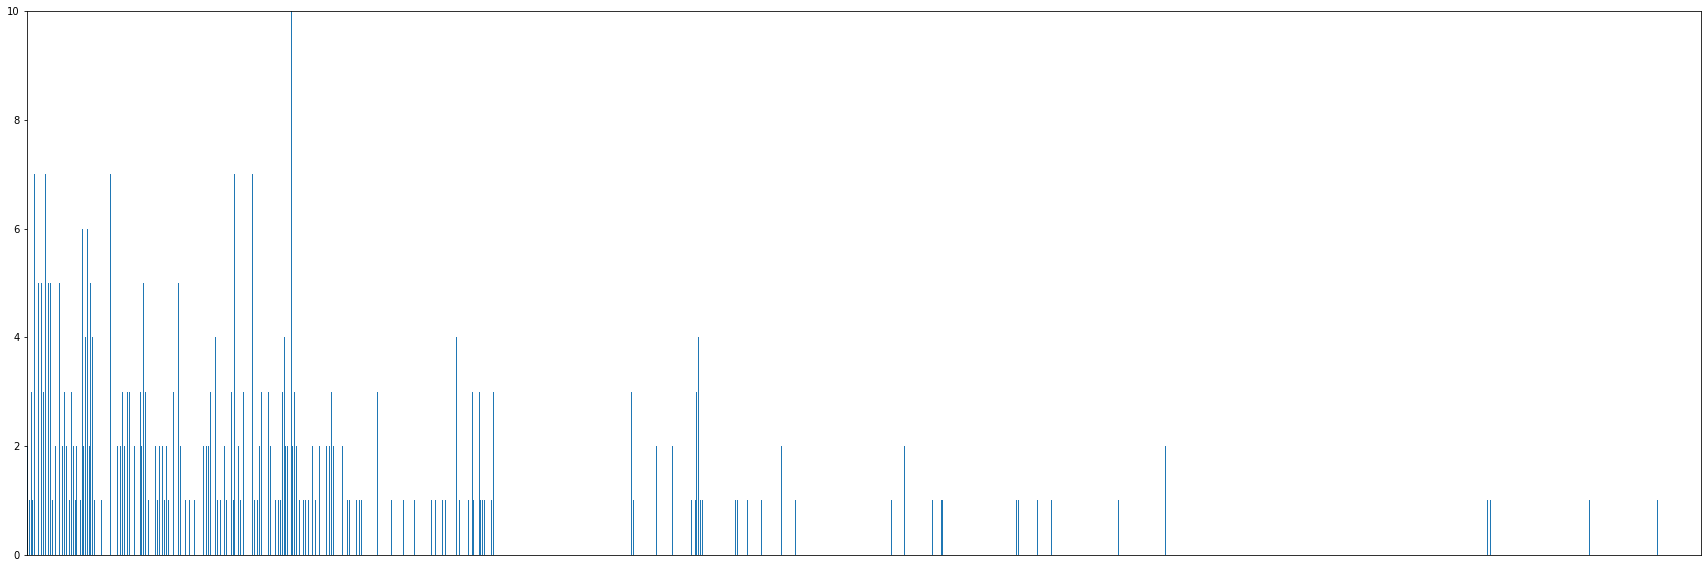

In [17]:
# want to plot a bar of height Post_Count for each Date
# ultimately may want to bin by months

# plot but suppress the x axis labels
#   with new complete dataframe including zero posting days
# need to set a y axis limit otherwise there is too much empty space 
# to discard the tuple that set_ylim produces, so that it doesn't display as
#   part of the chart, assign it to the "throwaway" underscore variable: _ 
ymin = 0
ymax = 10

ax = df_posts_plot_plus_zeroes.plot.bar(figsize=(30,10),legend=False)
ax.xaxis.set_visible(False)
_ = ax.set_ylim([ymin,ymax])

# End of code

# Sidebar: Uploading files from your local file system

files.upload returns a dictionary of the files which were uploaded. The dictionary is keyed by the file name and values are the data which were uploaded.

Note: Uploading will fail if you have third-party cookies blocked.  Which Google uploads and downloads require third-party cookies is inconsistent.

Commented-out code below is sample code to do an upload.

Stack Overflow - [Upload local files using Google Colab](https://stackoverflow.com/questions/48420759/upload-local-files-using-google-colab)

Recommended solution is to [whitelist](https://support.google.com/chrome/answer/95647#zippy=%2Callow-or-block-cookies-for-a-specific-site) the address below in Chrome (assuming you're using Chrome).
<pre>
https://[*.]googleusercontent.com:443
</pre>

Firefox seems to Enable third-party cookies for specific sites by [manually disabling Enhanced Tracking Protection](https://support.mozilla.org/en-US/kb/third-party-cookies-firefox-tracking-protection) on a per-website basis, but it's not clear how you do that without actually visiting the website itself.

Based on [Bugzilla Bug 1432644 Can't manually add exceptions to tracking protection list](https://bugzilla.mozilla.org/show_bug.cgi?id=1432644) it is probably impossible to whitelist <kbd>googleusercontent.com</kbd> in Firefox in the way that Chrome can.

Conclusion: Access the files from Google Drive and avoid all of these issues.


In [ ]:
# This code fails with "Upload widget is only available when the cell has been executed in the current browser session. Please rerun this cell to enable."
# The failure is due to blocked third-party cookies.

# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))

# Sidebar: Splitting a code or text block

In Jupyter Notebook in general, CTRL SHIFT - to split a code or text block at the cursor.

However in browser CTRL SHIFT - makes the text/view smaller.

In Google Colaboratory on Windows use CTRL m -

**Be very careful not to do CTRL m m which turns a code block into text.**

(This is pretty bad design from Colaboratory.)

Stack Overflow says use Command ⌘ instead of CTRL on a Mac but I haven't tested.

Stack Overflow - [How to split a code cell in Google Colab?](https://stackoverflow.com/questions/66692402/how-to-split-a-code-cell-in-google-colab)

If you need to undo, CTRL m z

Also be aware that on Windows 10, CTRL SHIFT is the default to switch keyboard layouts.  To disable this, use the long sequence of settings:

Windows Start - ⚙️ Settings - Devices - Typing - (scroll to the bottom) Advanced keyboard settings - Language bar options - (pops up a dialogue box) - Advanced key settings tab - Change Key Sequence...

superuser / StackExchange - [Keyboard language keeps changing in Windows 10](https://superuser.com/questions/976947/keyboard-language-keeps-changing-in-windows-10)

# Sidebar: Formatting text as code

You can use traditional HTML e.g. kbd, code, pre
or you can surround code blocks with Markdown three backticks

<pre>
This is HTML preformatted.
Which preserves line breaks
and     any     spacing
</pre>

<code>This is HTML code.</code>

```
This is Markdown three backticks.
```